In [1]:
test_metrics_path = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_[2022-11-28,15:18].pkl"
test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_continuous_[2022-11-28,15:25].pkl"
undersampling_interval = 10

test_metrics_path = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_[2022-11-29,09:47].pkl"
test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_continuous_[2022-11-29,10:58].pkl"
undersampling_interval = 1


test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_[2022-11-29,11:02].pkl"
test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_continuous_[2022-11-29,14:56].pkl"
undersampling_interval = 1

test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_no_sigmoid_[2022-11-29,15:56].pkl"
test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_no_sigmoid_continuous_[2022-11-29,16:19].pkl"
undersampling_interval = 10


test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_mock_[2022-12-02,08:57].pkl"
test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_mock_continuous_[2022-12-02,09:17].pkl"
undersampling_interval = 8


test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_mock_continuous_[2022-12-02,10:13].pkl"
undersampling_interval = 10

In [2]:
from src.data.util import open_file_pickle
import torch
import numpy as np
from src.util.util import milliseconds_to_samples, samples_to_milliseconds
import matplotlib.pyplot as plt
from tqdm import tqdm
from dataclasses import fields

/Users/ivopascal/.local/share/virtualenvs/Error-perception-classification-in-BCI-usi-IO2CUxHQ/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
test_metrics = open_file_pickle(test_metrics_path)
test_metrics_continuous = open_file_pickle(test_metrics_path_continuous)

In [4]:
[field.name for field in fields(test_metrics_continuous)]

['y_true',
 'y_predicted',
 'y_variance',
 'y_in_distribution',
 'y_subj_idx',
 'y_true_matrix',
 'y_predicted_matrix',
 'statscores',
 'precision',
 'recall',
 'negative_predictive_value',
 'accuracy_conf_matrix',
 'f1_score',
 'mcc',
 'n_mcc']

In [5]:
test_metrics_continuous.y_true

tensor([0, 0, 0,  ..., 0, 0, 0])

In [6]:
test_metrics_continuous.y_predicted.mean()

tensor(0.5714)

In [7]:
test_metrics_continuous.y_variance

tensor([0.0274, 0.0174, 0.0173,  ..., 0.0015, 0.0017, 0.0038])

In [8]:
test_metrics_continuous.y_in_distribution

tensor([False, False, False,  ..., False, False, False])

In [9]:
test_metrics.y_predicted[(test_metrics.y_predicted > 0) & (test_metrics.y_predicted < 1)]

tensor([7.9673e-01, 5.6819e-02, 9.6738e-01,  ..., 3.9098e-02, 1.6473e-04,
        2.5221e-01])

In [10]:
(abs(test_metrics_continuous.y_predicted - test_metrics_continuous.y_true) < 0.5).numpy().mean()

0.37674386160714285

In [11]:
(abs(test_metrics_continuous.y_predicted - test_metrics_continuous.y_true) < 0.5)[test_metrics_continuous.y_in_distribution].numpy().mean()

0.7504676393565283

In [12]:
event_indices = np.where(test_metrics_continuous.y_in_distribution.numpy())

In [13]:
y_true_id = test_metrics_continuous.y_true.clone().double()
y_true_id[~test_metrics_continuous.y_in_distribution] = 0.5

In [14]:
y_true_id[~test_metrics_continuous.y_in_distribution]

tensor([0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
       dtype=torch.float64)

tensor(1)


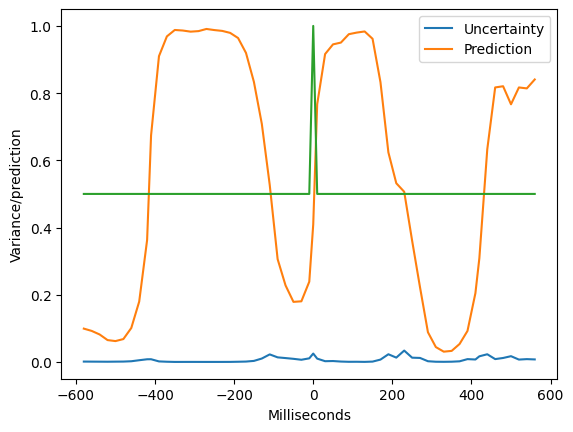

tensor(1)


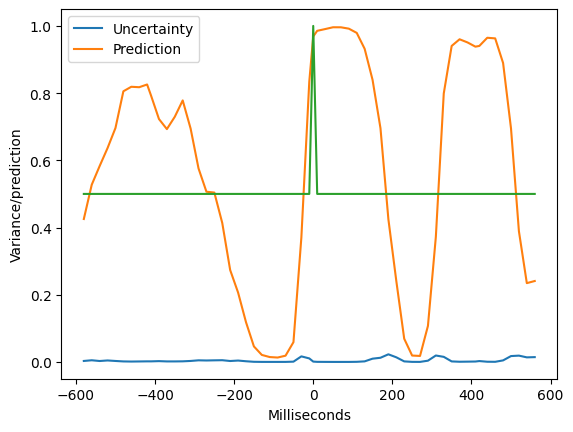

tensor(1)


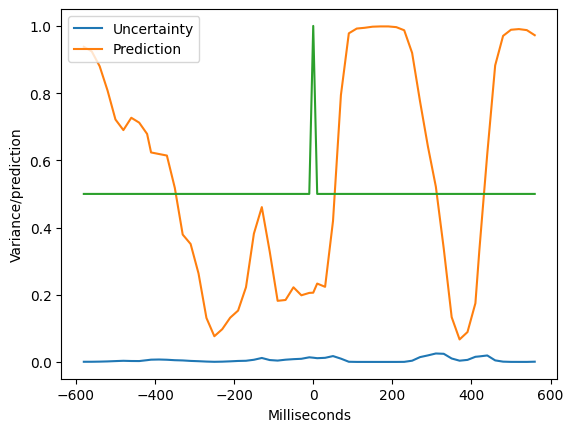

tensor(1)


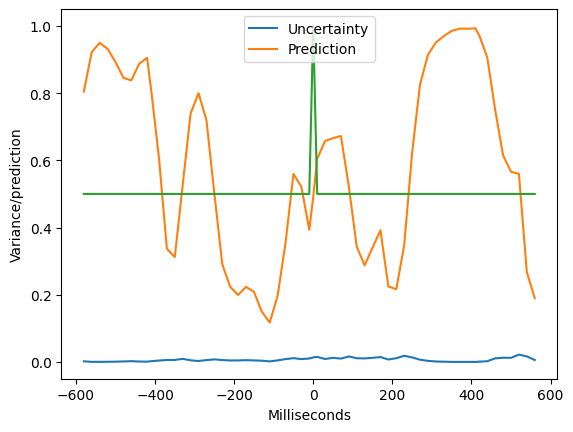

tensor(1)


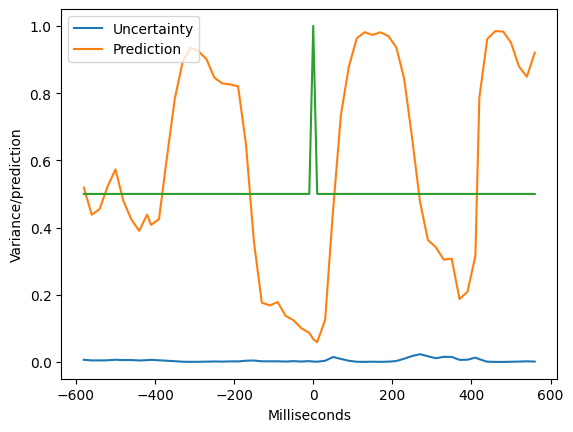

tensor(1)


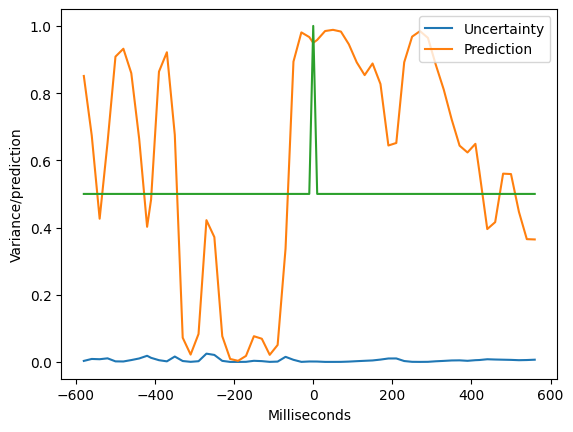

tensor(1)


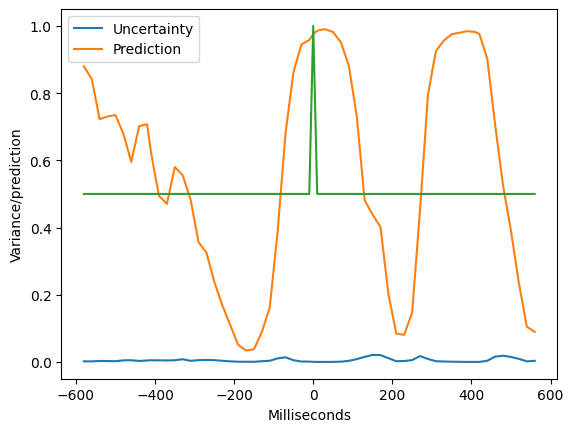

tensor(1)


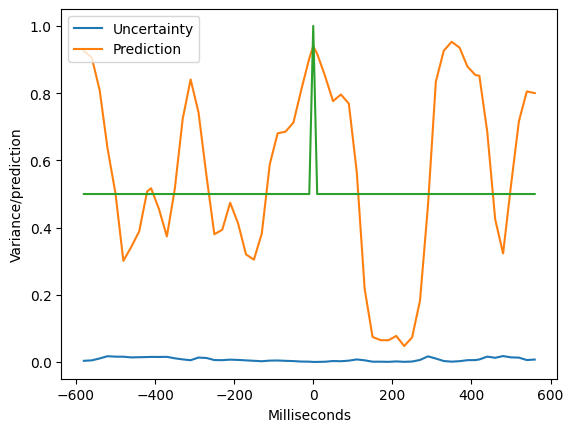

tensor(1)


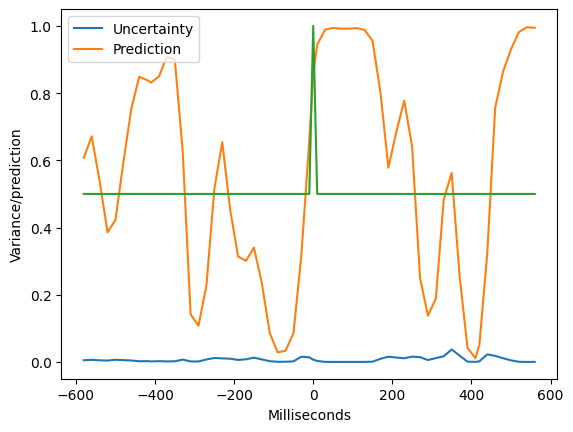

tensor(1)


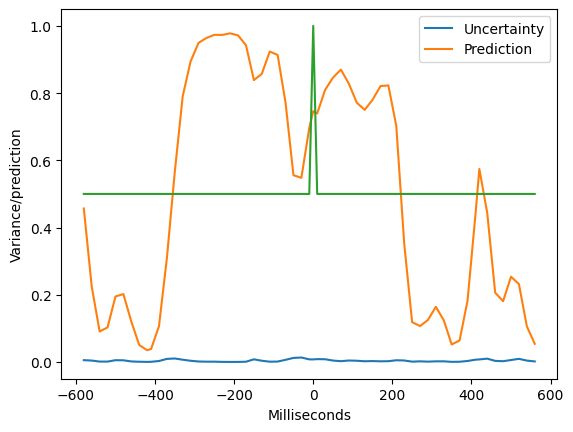

In [15]:
lower_window_ms = -600
upper_window_ms = 600
lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling_interval)
upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling_interval)
event_index = 1


x = [samples_to_milliseconds(step) * undersampling_interval for step in range(lower_window, upper_window)]

# for event_index in range(len(event_indices[0])):
for event_index in range(10):
    y_true = (test_metrics_continuous.y_true[event_indices[0][event_index]])
    print(y_true)
    
    # if y_true:
    #     continue

    color = "green" if y_true else "red"

    plt.plot(x, test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Uncertainty")
    plt.plot(x, test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Prediction")

    plt.xlabel("Milliseconds")
    plt.ylabel("Variance/prediction")
    plt.legend()
    # plt.vlines([-50, 0, 50], ymin=0, ymax=1, color=[color])
    plt.plot(x, y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Prediction")

    plt.show()

In [16]:
event_indices

(array([   588,    740,    964, ..., 557363, 557484, 557595]),)

In [17]:
test_metrics_continuous.y_variance

tensor([0.0274, 0.0174, 0.0173,  ..., 0.0015, 0.0017, 0.0038])

In [18]:
samples_to_milliseconds(50 / undersampling_interval)

9

In [19]:
test_metrics_continuous.y_in_distribution

tensor([False, False, False,  ..., False, False, False])

In [64]:
def make_average_around_event(lower_window_ms, upper_window_ms, undersampling=undersampling_interval, y_to_plot=None, label_prefix=""):
    lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling)
    upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling)


    x = [samples_to_milliseconds(step) * undersampling for step in range(lower_window, upper_window)]


    y_variances = []
    y_predictions = []
    y_trues = []
    y_subj = []
    for event_index in range(len(event_indices[0])):
        y_true = (test_metrics_continuous.y_true[event_indices[0][event_index]])
        # print(y_true)

        if y_to_plot != None and y_to_plot != y_true:
            continue

        color = "green" if y_true else "red"

        y_subj.append(test_metrics_continuous.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_variances.append(test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_predictions.append(test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])

    
    
    stacked_subjects = torch.vstack(y_subj)
    stacked_variances = torch.vstack(y_variances)
    stacked_predictions = torch.vstack(y_predictions)
    stacked_trues = torch.vstack(y_trues)
    
    predictions_per_participant = []
    variances_per_participant = []
    trues_per_participant = []

    for i in range(1, 7):
        predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        variances_per_participant.append(stacked_variances[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        trues_per_participant.append(stacked_trues[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))

    avg_variances = torch.vstack(variances_per_participant).mean(axis=0)
    std_variances = torch.vstack(variances_per_participant).std(axis=0)

    avg_predictions = torch.vstack(predictions_per_participant).mean(axis=0)
    std_predictions = torch.vstack(predictions_per_participant).std(axis=0)

    avg_trues = torch.vstack(trues_per_participant).mean(axis=0)
    std_trues = torch.vstack(trues_per_participant).std(axis=0)



    plt.plot(x, avg_variances, label=f"{label_prefix}Uncertainty")
    plt.fill_between(x, avg_variances - std_variances, avg_variances + std_variances , label=f"_{label_prefix}Variances", alpha=0.1)


    plt.plot(x, avg_predictions, label=f"{label_prefix}Predictions")
    plt.fill_between(x, avg_predictions - std_predictions, avg_predictions + std_predictions , label=f"_{label_prefix}Predictions", alpha=0.1)

    plt.plot(x, avg_trues, label=f"{label_prefix}Truths")
    plt.fill_between(x, avg_trues - std_trues, avg_trues + std_trues , label=f"_{label_prefix}Truths", alpha=0.1)

    # plt.legend()
    plt.xlabel("Time (ms)")
    plt.ylabel("Variance / prediction")
    plt.ylim(0, 1)
    # plt.show()

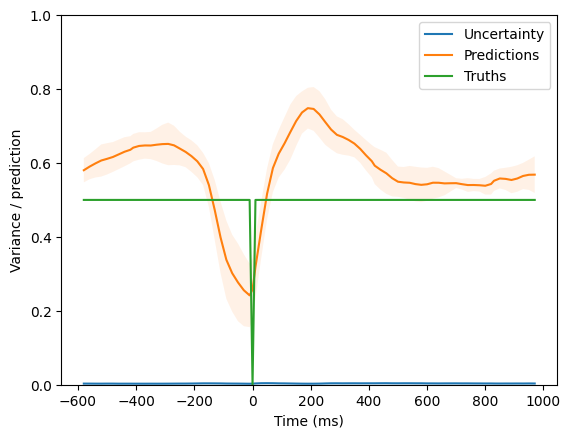

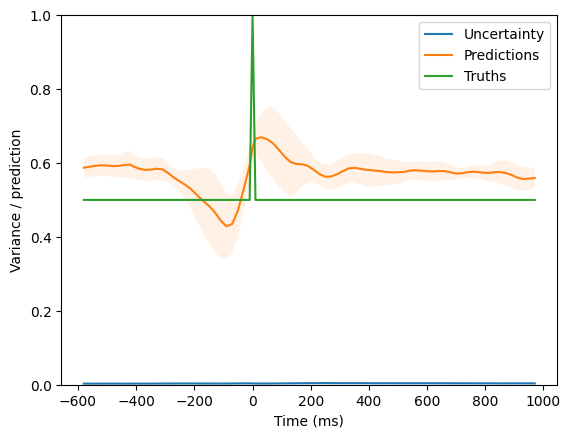

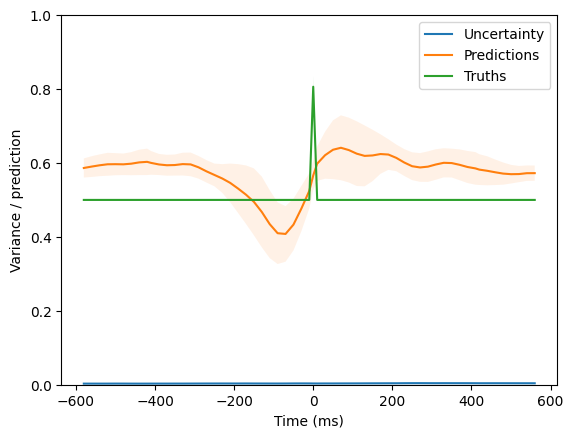

In [65]:
make_average_around_event(-600, 1000, y_to_plot = 0)
plt.legend()
plt.show()
make_average_around_event(-600, 1000, y_to_plot = 1)
plt.legend()
plt.show()
make_average_around_event(-600, 600, y_to_plot = None)
plt.legend()
plt.show()

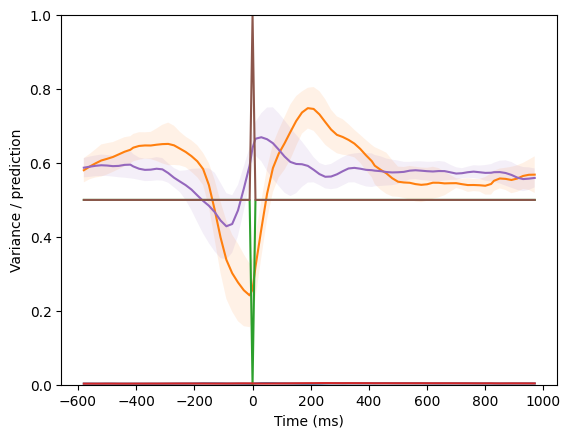

In [66]:
make_average_around_event(-600, 1000, y_to_plot = 0)
make_average_around_event(-600, 1000, y_to_plot = 1)
plt.show()

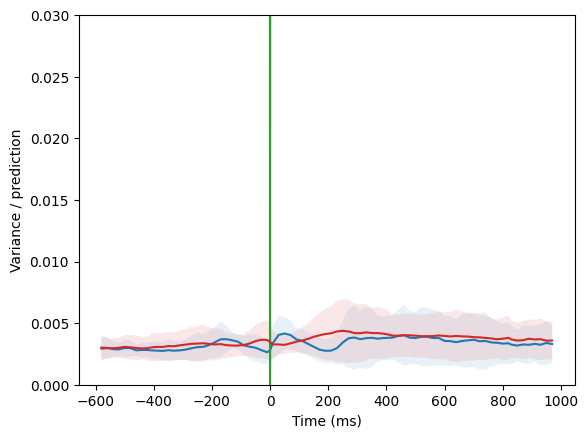

In [67]:
make_average_around_event(-600, 1000, y_to_plot = 0)
make_average_around_event(-600, 1000, y_to_plot = 1)
plt.ylim(0.0, 0.03)
plt.show()

In [68]:
make_average_around_event(-11000, 15000, y_to_plot = 0, label_prefix="non-error ")
make_average_around_event(-11000, 15000, y_to_plot = 1, label_prefix="error ")
plt.legend()
plt.show()

RuntimeError: shape '[-1, 1331]' is invalid for input of size 129152

In [ ]:
make_average_around_event(-11000, 15000, y_to_plot = 0, label_prefix="non-error ")
make_average_around_event(-11000, 15000, y_to_plot = 1, label_prefix="error ")
plt.legend()
plt.ylim(0.0, 0.03)
plt.show()

In [ ]:
make_average_around_event(-6000, 6000, y_to_plot = None)

In [ ]:
distances_to_next_event = []
for i in tqdm(range(len(test_metrics_continuous.y_variance))):
    distances = [i for i in event_indices[0] - i if i > 0]
    if not distances:
        continue
    distances_to_next_event.append(min(distances))

In [ ]:
plt.scatter(distances_to_next_event, test_metrics_continuous.y_variance[:len(distances_to_next_event)], alpha=0.1)
plt.xlabel("Distance to next event")
plt.ylabel("Uncertainty")
plt.xlim(-1, 500)
plt.ylim(-1, 20)

In [ ]:
distances_since_last_event = []
for i in tqdm(range(len(test_metrics_continuous.y_variance))):
    distances = [i for i in event_indices[0] - i if i < 0]
    if not distances:
        continue
    distances_since_last_event.append(abs(max(distances)))

plt.scatter(distances_to_next_event, test_metrics_continuous.y_variance[:len(distances_to_next_event)], alpha=0.1)
plt.xlabel("Distance since last event")
plt.ylabel("Uncertainty")
plt.xlim(-1, 5000)
plt.ylim(-1, 20)

In [ ]:
(event_indices[0] - i)[(event_indices[0] - i) > 0]

In [ ]:
min(i for i in event_indices[0] - i if i > 0)

In [ ]:
distances_to_nearest_event = []
for i in tqdm(range(len(test_metrics_continuous.y_variance))):
    distances_to_nearest_event.append(min(abs(event_indices[0] - i)))

plt.scatter(distances_to_nearest_event, test_metrics_continuous.y_variance, alpha=0.1)
plt.xlabel("Distance to nearest event")
plt.ylabel("Uncertainty")
# plt.xlim(-1, 50)
plt.ylim(-1, 20)




In [ ]:
plt.plot(test_metrics_continuous.y_variance)
plt.plot(test_metrics_continuous.y_predicted)

In [44]:
# lower_window_m
# lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling)
# upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling)


# x = [samples_to_milliseconds(step) * undersampling for step in range(lower_window, upper_window)]


y_variances = []
y_predictions = []
y_trues = []
y_subj = []
for event_index in range(len(event_indices[0])):
    y_true = (test_metrics_continuous.y_true[event_indices[0][event_index]])
    # print(y_true)

    # if y_to_plot != None and y_to_plot != y_true:
    #     continue

    color = "green" if y_true else "red"

    y_variances.append(test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_predictions.append(test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_subj.append(test_metrics_continuous.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    
    y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])


In [52]:
stacked_predictions = torch.vstack(y_predictions)

In [53]:
stacked_subjects = torch.vstack(y_subj)

In [54]:
predictions_per_participant = []
stacked_predictions = torch.vstack(y_predictions)
for i in range(1, 7):
    predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(stacked_subjects.shape[1], -1).mean(axis=1))

In [55]:
torch.vstack(predictions_per_participant).shape


torch.Size([6, 60])

In [49]:
torch.vstack(y_predictions).shape

torch.Size([2673, 60])

In [ ]:
torch.vstack(y_predictions)[stack_subj == i].reshape(stack_subj.shape[1], -1).mean(axis=0)

In [ ]:
y_predictions

In [58]:
stacked_subjects.shape

torch.Size([2673, 60])

In [60]:
y_variances = []
y_predictions = []
y_trues = []
y_subj = []
for event_index in range(len(event_indices[0])):
    y_true = (test_metrics_continuous.y_true[event_indices[0][event_index]])
    # print(y_true)

    # if y_to_plot != None and y_to_plot != y_true:
    #     continue

    color = "green" if y_true else "red"

    y_subj.append(test_metrics_continuous.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_variances.append(test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_predictions.append(test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])



stacked_subjects = torch.vstack(y_subj)
stacked_variances = torch.vstack(y_variances)
stacked_predictions = torch.vstack(y_predictions)
stacked_trues = torch.vstack(y_trues)

predictions_per_participant = []
variances_per_participant = []
trues_per_participant = []

for i in range(1, 7):
    predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
    variances_per_participant.append(stacked_variances[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
    trues_per_participant.append(stacked_trues[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))

In [63]:
torch.vstack(predictions_per_participant).shape

torch.Size([6, 60])